# Kruskal and Prim  Algorithm: Minimum Spanning Tree(MST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
seed = 42
np.random.seed(seed=seed)

## Parameters

In [2]:
num = 20
path = np.concatenate([np.arange(num), [0]])
X = np.random.random(num)
Y = np.random.random(num)
XY = X + Y * 1j

## Plot functions

In [3]:
def plot_list(path, plist=False, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis('equal')
    plt.plot(X[path], Y[path], alpha=0)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    plt.scatter(X[1:], Y[1:], s=40, c=cmap(0), marker='o')
    if plist:
        for p in plist:
            plt.plot(X[p], Y[p])
    
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')
        
def list_score(path):
    sc = 0
    for p in path:
        sc += np.abs(XY[p[0]] - XY[p[1]])
    return sc

## Kruskal MST

In [4]:
def kruskal(path):
    dist = []
    idx = []
    for i in range(len(path)):
        for j in range(i+1, len(path)):
            dist.append(np.abs(XY[i] - XY[j]))
            idx.append([i,j])
    arg = np.argsort(dist)
    edge_list = [idx[a] for a in arg]
    
    plist = []
    group = []
    for edge in edge_list:
        if set(edge) & set(sum(group, [])):     # either in all groups
            merge_list = []
            for i in range(len(group)):
                if set(edge) <= set(group[i]):  # both in one group
                    continue
                elif set(edge) & set(group[i]): # either in one group
                    merge_list.append(i)
            if len(merge_list) > 0:
                group[merge_list[0]] = list(set(sum([group[m] for m in merge_list] + [edge], [])))
                [group.pop(i) for i in merge_list[1:]]
                plist.append(edge)                
        else:
            group.append(edge)
            plist.append(edge)
    return plist

MST Score: 3.033652590015278  Num Edges: 19
Edges: [[13, 14], [5, 15], [1, 11], [0, 18], [9, 12], [4, 19], [16, 19], [1, 12], [13, 15], [2, 3], [9, 17], [0, 19], [8, 18], [4, 10], [5, 10], [3, 8], [2, 9], [2, 7], [6, 16]]


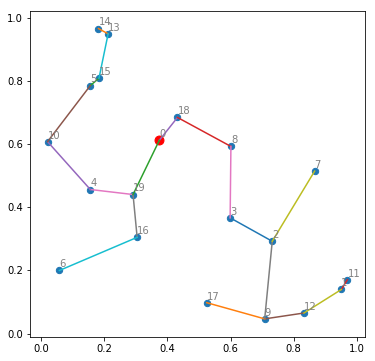

In [5]:
edges = kruskal(path[:-1])
plot_list(path, edges, 6)
print('MST Score:', list_score(edges), ' Num Edges:',len(edges))
print('Edges:', edges)

## Prim MST

In [6]:
def nearest_node_dist(path, index):
    best_dist = np.inf
    best_node = None
    for p in path:
        if p != index:
            d = abs(XY[p] - XY[index])
            if d < best_dist:
                best_dist = d
                best_node = p
    return best_node, best_dist

def prim(path):
    copy = list(path)
    if path[0] == path[-1]:
        copy = list(path[:-1])
    node, _ = nearest_node_dist(copy, path[0])
    plist = [[path[0], node]]
    copy.remove(path[0])
    copy.remove(node)
    
    while len(copy):
        best_dist = np.inf
        best_edge = None
        for p in set(np.ravel(plist)):
            node, dist = nearest_node_dist(copy, p)
            if dist < best_dist:
                best_dist = dist
                best_edge = [p, node]
        plist.append(best_edge)
        copy.remove(best_edge[1])
    return plist

MST Score: 3.0336525900152775  Num Edges: 19
Edges: [[0, 18], [0, 19], [19, 4], [19, 16], [18, 8], [4, 10], [10, 5], [5, 15], [15, 13], [13, 14], [8, 3], [3, 2], [2, 9], [9, 12], [12, 1], [1, 11], [9, 17], [2, 7], [16, 6]]


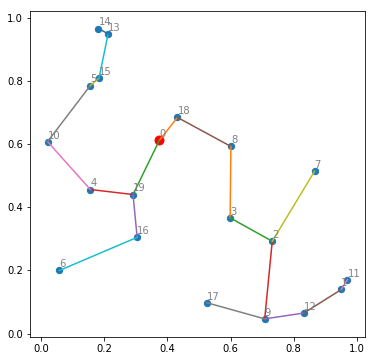

In [7]:
edges = prim(path)
plot_list(path, edges, 6)
print('MST Score:', list_score(edges), ' Num Edges:',len(edges))
print('Edges:', edges)

## Scipy MST

MST Score: 3.0336525900152775  Num Edges: 19
Edges: [[0, 18], [1, 12], [2, 3], [2, 7], [3, 8], [5, 15], [6, 16], [9, 2], [9, 17], [10, 4], [10, 5], [11, 1], [12, 9], [14, 13], [15, 13], [16, 19], [18, 8], [19, 0], [19, 4]]


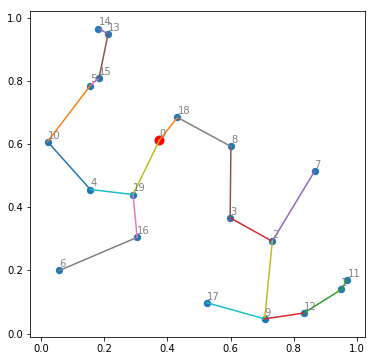

In [8]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree as MSP

matrix = []
for i in range(num):
    matrix.append([])
    for j in range(num):
        matrix[i].append(abs(XY[i] - XY[j]))
        
MX = csr_matrix(matrix)
Tcsr = MSP(MX)
Tcsr = Tcsr.toarray()*1000
#Tcsr = Tcsr.astype(np.int32)

edges = []
for i in range(num):
    for j in range(num):
        if Tcsr[i][j] > 0:
            edges.append([i, j])

plot_list(path, edges, 6)
print('MST Score:', list_score(edges), ' Num Edges:',len(edges))
print('Edges:', edges)